In [22]:
# Run the top two cells in this notebook first, every time you reopen your notebook.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import nn_practice

### Neural network practice

In this problem, you'll do some calculations for a neural network with one input unit ($x_{1}$), one hidden unit ($x_{2}$), and one output unit ($x_{3}$). This network does not include any bias nodes. Here's a picture:

<img src="images/NeuralNetChain.png" alt="Neural network architecture" style="width: 500px;"/>


<div class="alert alert-success">Assume that $g$ is a logistic function:

$$g(n) = \frac{1}{1+e^{-n}}$$

If we initialize the connection weights to $w_{1} = 5$ and $w_{2} = -0.5$, then what are the activations for $x_{2}$ and $x_{3}$ when $x_{1} = 0$? What about when $x_{1} = 1$? Show your work.</div>

#### When $x_1 == 0$
$x_2 = \frac{1}{1+e^{w_1 \cdot x_1}} = \frac{1}{2}$

$x_3 = \frac{1}{1+e^{w_2 \cdot x_2}} = 0.5621765 $

#### When $x_1 == 1$
$x_2 = \frac{1}{1+e^{w_1 \cdot x_1}} = 0.00669$

$x_3 = \frac{1}{1+e^{w_2 \cdot x_2}} = 0.50083 $

<div class="alert alert-success">We'd like this network to learn two $(x_{1},x_{3})$ pairs: $(0,1)$ and $(1,0)$. Recall that the squared error for a single input/output pair is just the square of the difference between the network's output and the target output. For multiple input/output pairs, the total errror is calculated as the sum of squared error: the sum of each of the individual squared errors. This is known as the <i>sum squared error</i>. Compute the sum squared error for these two pairs given the $g$ and weights shown above. Show your work.</div>

SquaredError = $(y -g(Wx))^2$

for (0,1): y = 1, $g(Wx) = 0.562$, error = $0.1917$

for (1,0): y = 0, $g(Wx) = 0.50083$, error = $0.25083$

$\therefore$

SummedError = $0.1917 + 0.25083 = 0.44253$

<div class="alert alert-success">In <tt>nn_practice.py</tt>, write a function <tt>calc_output</tt> that takes two parameters: (1) a value for $x_{1}$ and (2) the weights for the network, expressed as a tuple $(w_{1}, w_{2})$. This function should return the output for the network, assuming that $g$ is the logistic function. Test your function in the cell below.</div>

In [29]:
print("the output from w1 = 0:",nn_practice.calc_output(0,(5,-0.5)))
print("the output from w1 = 1:",nn_practice.calc_output(1,(5,-0.5)))


the output from w1 = 0: 0.5621765008857981
the output from w1 = 1: 0.500836605584804


<div class="alert alert-success">Now write a function <tt>sum_squared_error</tt> in <tt>nn_practice.py</tt> that takes two parameters: (1) a two-dimensional list, where each inner list has two items: the value for the input, followed by the target value for the output, and (2) the weights for the network. This function should return the sum squared error for these data. Again, assume that $g$ is the logistic function. Test your function in the cell below.</div>

<div class="alert alert-success">In the cell below, write code to make a plot of the sum squared error in your network on the two pairs given above as a function of the weights. You'll want to consider $(w_{1},w_{2}$ pairs where each item in the pair can range from $-5$ to $5$. These will be your x/y coordinates. Then, the color of each point in the grid will be based on the value of the sum squared error for the two pairs. The <tt>contourf</tt> function in matplotlib facilitates making such a graph.

<a href="http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour">You can see some documentation here.</a> Note that you should be carefuly about the indexing in relating the values of the weights and the values of the sum-squared error - it's easy to get the axes backwards. <a href="http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.colorbar">Use the <tt>colorbar</tt> function</a> to add a legend that will allow you to interpret the meaning of the colors in your plot. Note that the input to colorbar is the object returned by contourf. Make sure to label your axes and title the graph appropriately. Based on your graph, suggest a set of weights that would do better (i.e., would have a lower sum squared error) than your initial weights of $w_1= 5$ and $w_2= −0.5$.</div>

<div class="alert alert-success">Weight updates can be computed using the delta rule and the generalized delta rule. One thing you'll need to know is the derivative of the logistic function, which is: $g'(n) = g(n)\cdot(1-g(n))$. Write a function <tt>compute_w2_update</tt> in your module that takes in the following parameters: (1) the input to the network, (2) the target (desired) output, (3) the weights as a tuple $(w_{1},w_{2})$, and (4) the learning rate $\eta$. It should return the change that should be made to $w_{2}$ given that this input/output error was just observed. Test your function in the cell below, comparing the output to one that you calculate by hand.</div>

<div class="alert alert-success">Now, write a function <tt>compute_w1_update</tt> in your module that takes in the following parameters: (1) the input to the network, (2) the target (desired) output, (3) the weights as a tuple $(w_{1},w_{2})$, and (4) the learning rate $\eta$. It should return the change that should be made to $w_{1}$ given that this input/output error was just observed. Test your function in the cell below, comparing the output to one that you calculate by hand.</div>

<div class="alert alert-success">Use your function to compute the weight updates given that you observe (1, 0) and (0,1). Do these weight updates take you in the direction of the "optimal" weights you identified from your plot? Explain your results in terms of your error plot and what you know about gradient descent optimization algorithms.
</div>

### Interpreting neural network results

I used a neural network to try to classify which parts of an image were grass versus which parts of the image were path.  (<a href="http://archive.ics.uci.edu/ml/datasets/Image+Segmentation">You can learn more about the dataset here.</a>

The graph below shows my sum of squared errors for various numbers of hidden units in my network. I always had 19 input units, and a single output unit, plus biases at each layer.

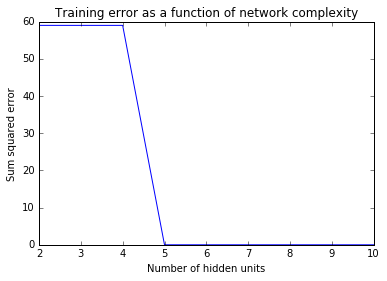

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt("data/NetworkError.txt")

plt.plot(range(2,11), data[:,1])
plt.xlabel("Number of hidden units")
plt.ylabel("Sum squared error")
plt.title("Training error as a function of network complexity")
plt.show()

<div class="alert alert-success">Using what you know about neural networks and when they do and do not learn successfully, briefly explain why I might see the pattern observed in the graph.</div>

<div class="alert alert-success">In a few sentences explain what might happen if the learning rate was set too high and conceptually why this could occur.</div>